In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
sys.path.append("/Users/admin/Desktop/projects/lb_time/utils")

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.externals import joblib
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
import function
import preprocessing
import local_bayes
import visualize

In [56]:
sys.path.append("/Users/admin/Desktop/projects/lb_time/models/cnn")

In [39]:
p = preprocessing.Preprocessing(data_dir = "../original_data/bookmark/")

# data load

In [17]:
## 注意: このデータロードはdataを入力とする場合, 関数ごとに毎回必要
ajax = p.load_data("ajax.twd")

In [18]:
category_ts, category_sum = p.timeseries(ajax)

56000 web page ended

## example

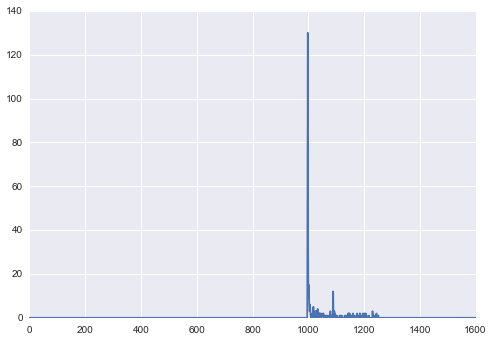

In [19]:
plt.plot(category_ts[0])

In [20]:
category_started_ts = p.make_started_ts(category_ts)

2000

In [21]:
category_started_ts[0]

[75,
 130,
 37,
 11,
 9,
 15,
 7,
 3,
 3,
 6,
 3,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 5,
 1,
 0,
 0,
 2,
 1,
 3,
 0,
 2,
 3,
 0,
 1,
 0,
 3,
 3,
 4,
 4,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 12,
 2,
 0,
 1,
 3,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 

In [22]:
category_input_ts, category_label, category_input_sum = p.make_supervised_data(category_started_ts)

11891 data created

In [23]:
category_input_ts[0]

array([ 75, 130,  37,  11,   9,  15,   7,   3,   3,   6,   3,   1,   1,
         0,   1,   0,   0,   2,   0,   1,   2,   5,   1,   0,   0,   2,
         1,   3,   0,   2])

In [33]:
x, label = p.balancing_sampling(category_input_ts, category_label)

In [42]:
save_data_dir = '../data/bookmark/'
p.make_test_dataset(x, label, save_data_dir)

In [46]:
train_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')

# model training

In [103]:
import cnn

In [107]:
epoch_num = 100
save_model_dir = "../models/cnn/results/awesome_%s/" % epoch_num
os.mkdir("../models/cnn/results/awesome_%s" % epoch_num)
train_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_train.npz')
test_0_0 = numpy.load(save_data_dir + '0_test/0_fold/0_test.npz')
cnntrain = train.CNN(save_model_dir=save_model_dir, epoch_num=epoch_num)

In [108]:
cnntrain.train(train_0_0, test_0_0)

epoch 1
graph generated
train mean loss=0.747715288829, accuracy=0.695259121162, throughput=1062.12165176 images/sec
test  mean loss=0.562060799014, accuracy=0.723296890848
epoch 2
train mean loss=0.566768836326, accuracy=0.722905499093, throughput=976.508961176 images/sec
test  mean loss=0.549204724942, accuracy=0.718671155738
epoch 3
train mean loss=0.55313285647, accuracy=0.726689793354, throughput=1042.76567524 images/sec
test  mean loss=0.529462359476, accuracy=0.737594624143
epoch 4
train mean loss=0.514963163405, accuracy=0.739093872779, throughput=992.446958849 images/sec
test  mean loss=0.521328294548, accuracy=0.740538263892
epoch 5
train mean loss=0.511277195283, accuracy=0.744034481013, throughput=1046.24575785 images/sec
test  mean loss=0.509879222906, accuracy=0.738015142682
epoch 6
train mean loss=0.510085484901, accuracy=0.753179857279, throughput=1046.91530268 images/sec
test  mean loss=0.524735399662, accuracy=0.734650969455
epoch 7
train mean loss=0.498031680778, acc